In [3]:
import os
home_floder = os.path.expanduser("~")
print(home_floder)

/home/zzyo


In [6]:
data_filename = os.path.join(home_floder, 'zzyoWorkSpace/python-Project/py3env/py3Workspace/'
                                          'DM-Learn/DM-Learn/Code_REWRITE/Chapter 2', 'ionosphere.data')
print(data_filename)

/home/zzyo/zzyoWorkSpace/python-Project/py3env/py3Workspace/DM-Learn/DM-Learn/Code_REWRITE/Chapter 2/ionosphere.data


In [9]:
import csv
import numpy as np

x = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='float')

with open(data_filename, 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        data = [float(datum) for datum in row[:-1]]
        x[i] = data
        y[i] = row[-1] == 'g'

In [12]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=14)
print("There are {} samples in the training dataset".format(x_train.shape[0]))
print("There are {} samples in the testing dataset".format(x_test.shape[0]))
print("Each sample has {} features".format(x_train.shape[1]))

There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


In [14]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
estimator.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
y_predicted = estimator.predict(x_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("the accuracy is {0:.1f}".format(accuracy))

the accuracy is 86.4


In [19]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator, x, y, scoring='accuracy')
average_accuracy = np.mean(scores)*100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 83.5%


In [21]:
avg_scores = []
all_scores = []
paramter_value = list(range(1,21))
for n_neighbors in paramter_value:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, x,y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

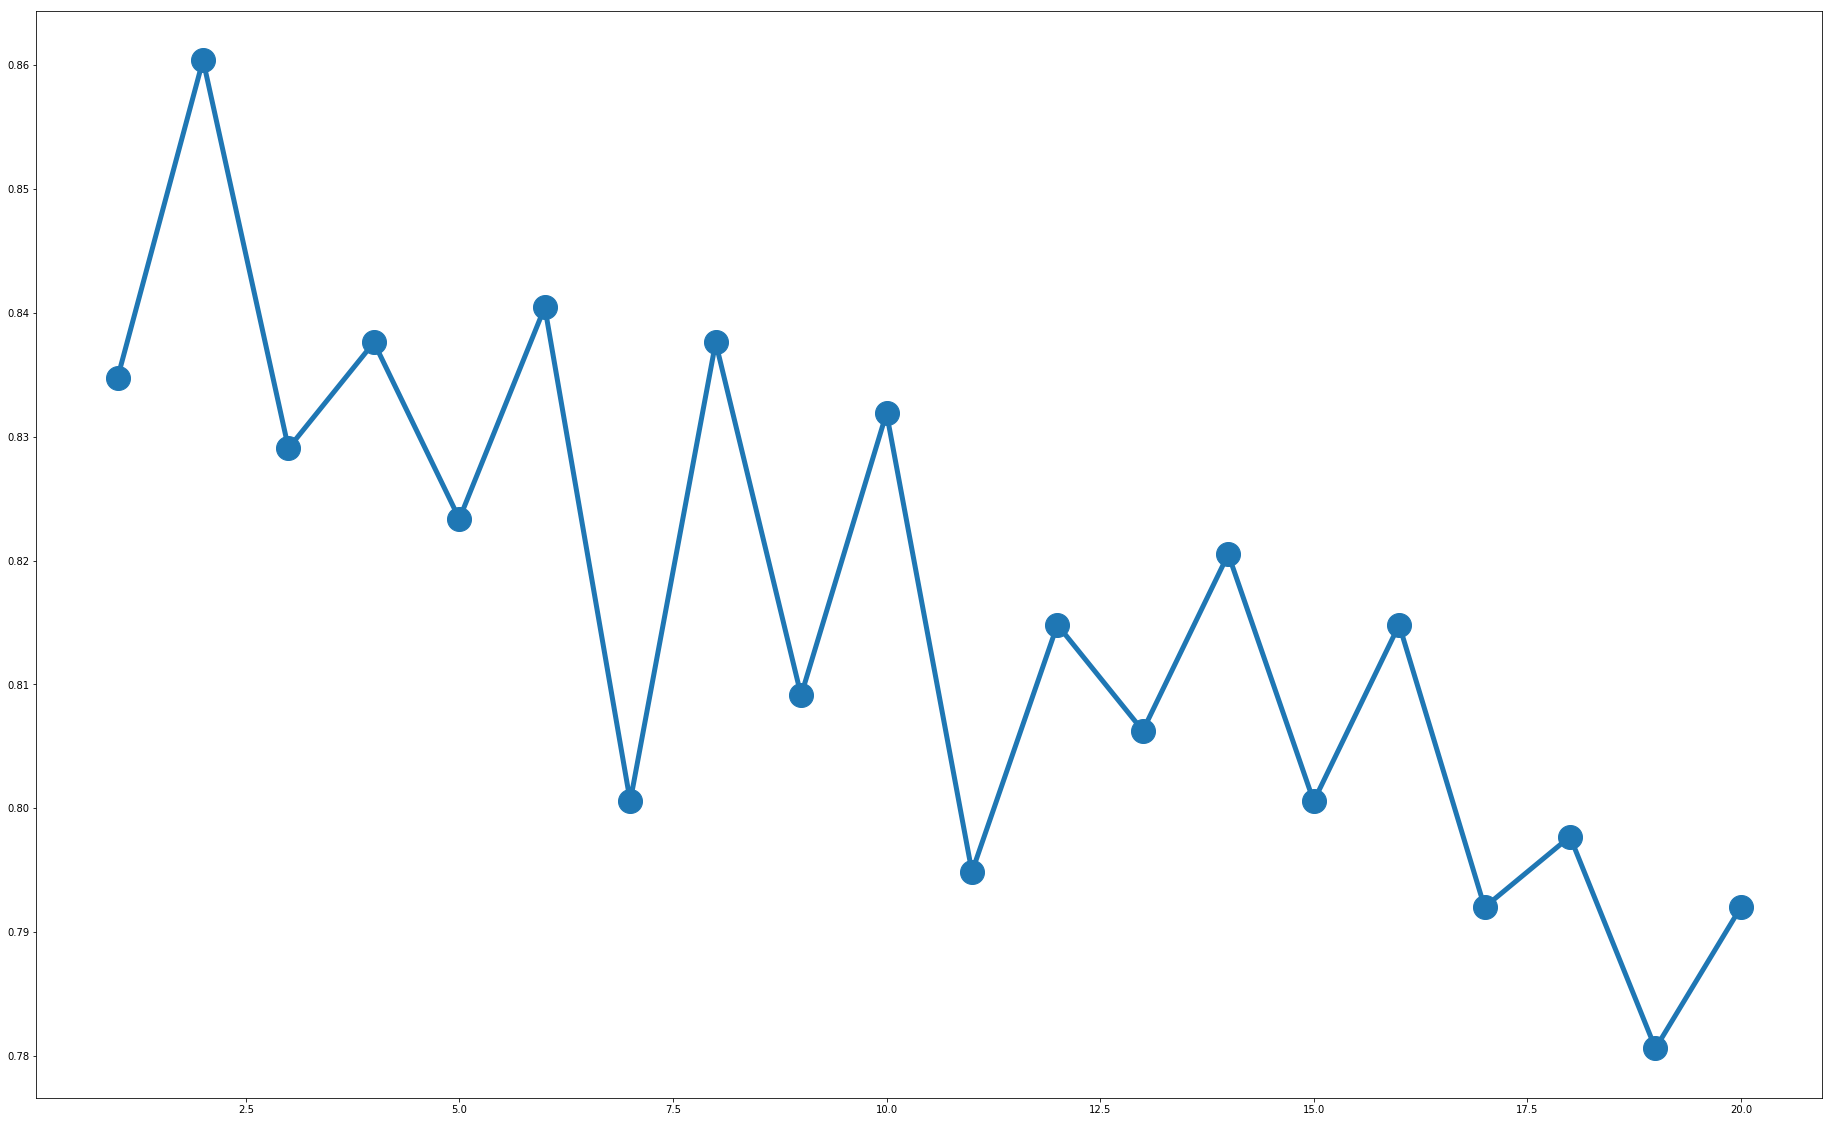

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(32, 20))
plt.plot(paramter_value, avg_scores, '-o', linewidth=5, markersize=24)

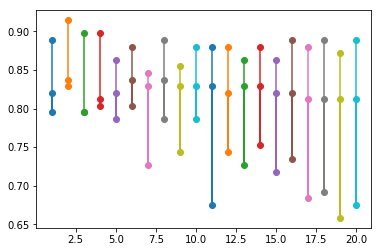

In [25]:
for paramter, scores in zip(paramter_value, all_scores):
    n_scores = len(scores)
    plt.plot([paramter] * n_scores, scores, '-o')

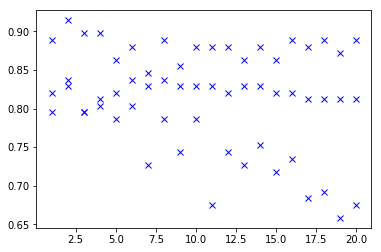

In [28]:
plt.plot(paramter_value, all_scores, 'bx')